In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScale


In [15]:
# Load your dataset
df = pd.read_csv('heart_disease_uci.csv') 

In [16]:
# Check if the DataFrame is created
print("Initial DataFrame shape:", df.shape)
print(df.head())  

Initial DataFrame shape: (920, 16)
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4

In [17]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [18]:
# Convert categorical columns to 'category' type
df['fbs'] = df['fbs'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['ca'] = df['ca'].astype('category')
df['thal'] = df['thal'].astype('category')

In [19]:
# Fill missing values for numeric columns with mean
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())
df['chol'] = df['chol'].fillna(df['chol'].mean())

In [20]:
# Fill missing values for categorical columns with mode
df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])  # Assuming mode for categorical
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

In [21]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [22]:
# Print the shape after cleaning
print("DataFrame shape after cleaning:", df.shape)

DataFrame shape after cleaning: (920, 16)


In [23]:
# Inspect the last few rows after cleaning
print("Last few rows of the DataFrame:\n", df.tail())

Last few rows of the DataFrame:
       id  age     sex        dataset               cp    trestbps   chol  \
915  916   54  Female  VA Long Beach     asymptomatic  127.000000  333.0   
916  917   62    Male  VA Long Beach   typical angina  132.132404  139.0   
917  918   55    Male  VA Long Beach     asymptomatic  122.000000  223.0   
918  919   58    Male  VA Long Beach     asymptomatic  132.132404  385.0   
919  920   62    Male  VA Long Beach  atypical angina  120.000000  254.0   

       fbs           restecg      thalch  exang   oldpeak slope   ca  \
915   True  st-t abnormality  154.000000  False  0.000000  flat  0.0   
916  False  st-t abnormality  137.545665  False  0.878788  flat  0.0   
917   True  st-t abnormality  100.000000  False  0.000000  flat  0.0   
918   True    lv hypertrophy  137.545665  False  0.878788  flat  0.0   
919  False    lv hypertrophy   93.000000   True  0.000000  flat  0.0   

             thal  num  
915        normal    1  
916        normal    0  
91

In [24]:
# Optional: Standardize the numeric columns if needed
numeric_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Descriptive names for features
feature_names = {
    'age': 'Age',
    'trestbps': 'Resting Blood Pressure (mm Hg)',
    'chol': 'Cholesterol Level (mg/dl)',
    'thalch': 'Maximum Heart Rate Achieved',
    'oldpeak': 'ST Depression Induced by Exercise',
    'num': 'Presence of Heart Disease',
    'sex': 'Sex (0 = Female, 1 = Male)',
    'fbs': 'Fasting Blood Sugar > 120 mg/dl (1 = True, 0 = False)',
    'exang': 'Exercise Induced Angina (1 = Yes, 0 = No)',
    'slope': 'Slope of Peak Exercise ST Segment',
    'ca': 'Number of Major Vessels (0-3) Colored by Fluoroscopy',
    'thal': 'Thalassemia (1 = Normal; 2 = Fixed Defect; 3 = Reversable Defect)',
}

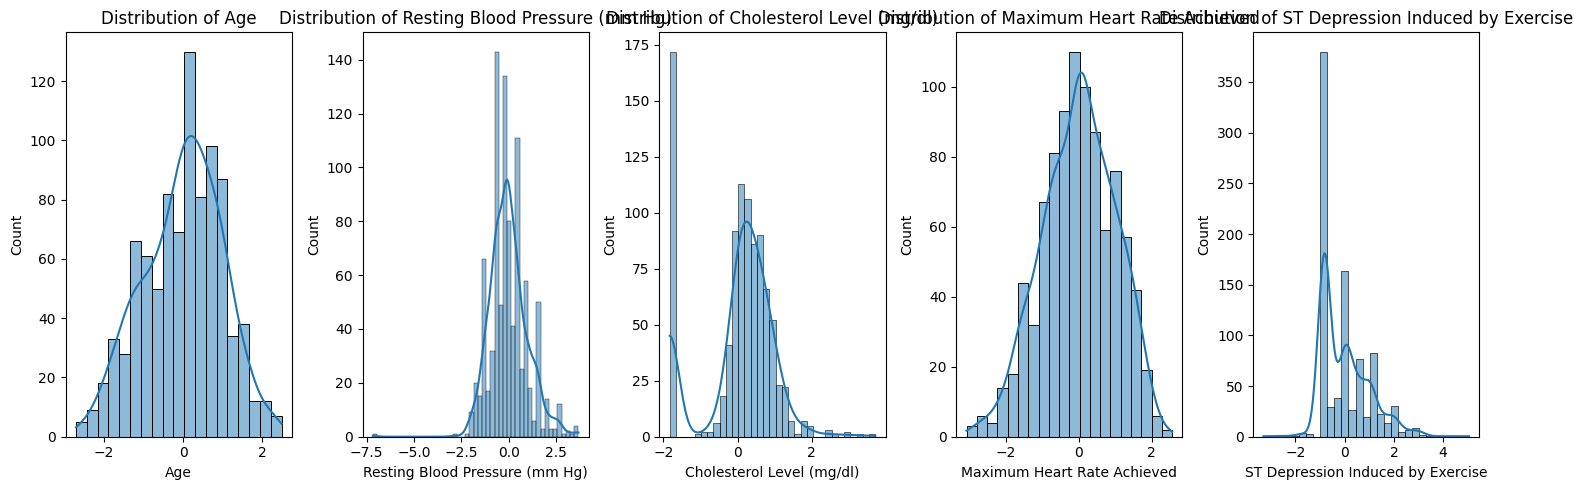

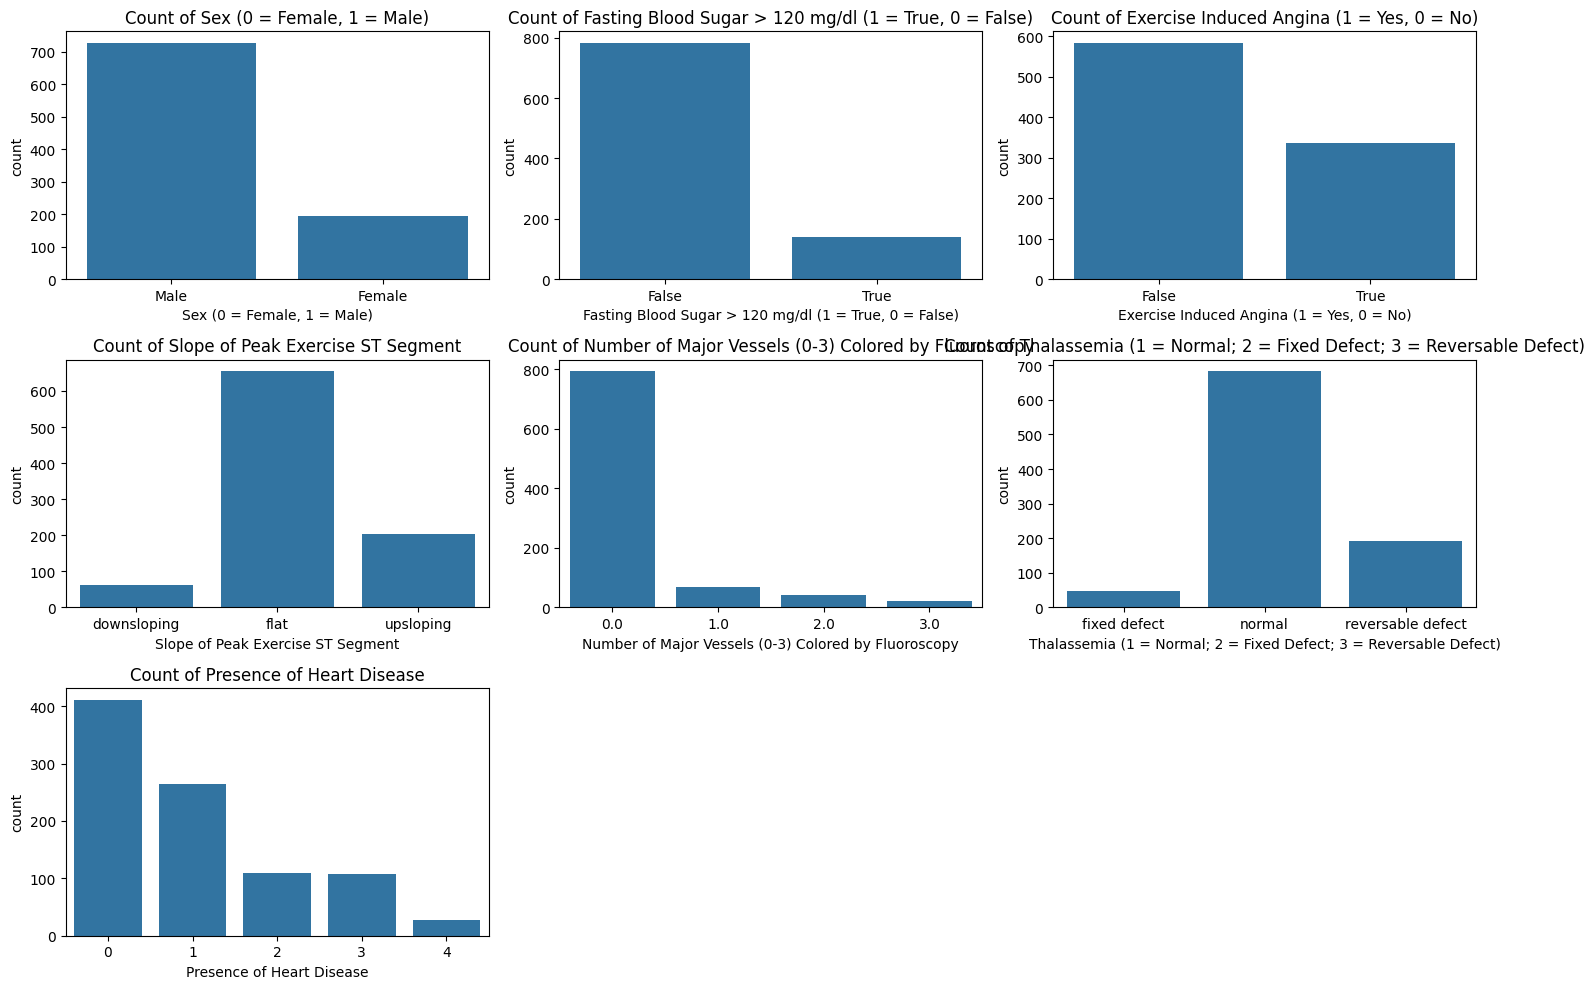

In [25]:
# Visualizations
plt.figure(figsize=(15, 5))

# Histogram for numeric features
for i, feature in enumerate(numeric_features):
    plt.subplot(1, len(numeric_features), i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature_names[feature]}')
    plt.xlabel(feature_names[feature])

plt.tight_layout()
plt.show()

# Count plots for categorical features
plt.figure(figsize=(15, 10))

# Categorical features to visualize
categorical_features = ['sex', 'fbs', 'exang', 'slope', 'ca', 'thal', 'num']
num_features = len(categorical_features)

# Set the number of rows and columns for subplots
num_columns = 3
num_rows = (num_features // num_columns) + (num_features % num_columns > 0)

for i, feature in enumerate(categorical_features):
    plt.subplot(num_rows, num_columns, i + 1)  # Adjusting the subplot dimensions
    sns.countplot(data=df, x=feature)
    plt.title(f'Count of {feature_names[feature]}')
    plt.xlabel(feature_names[feature])

plt.tight_layout()
plt.show()

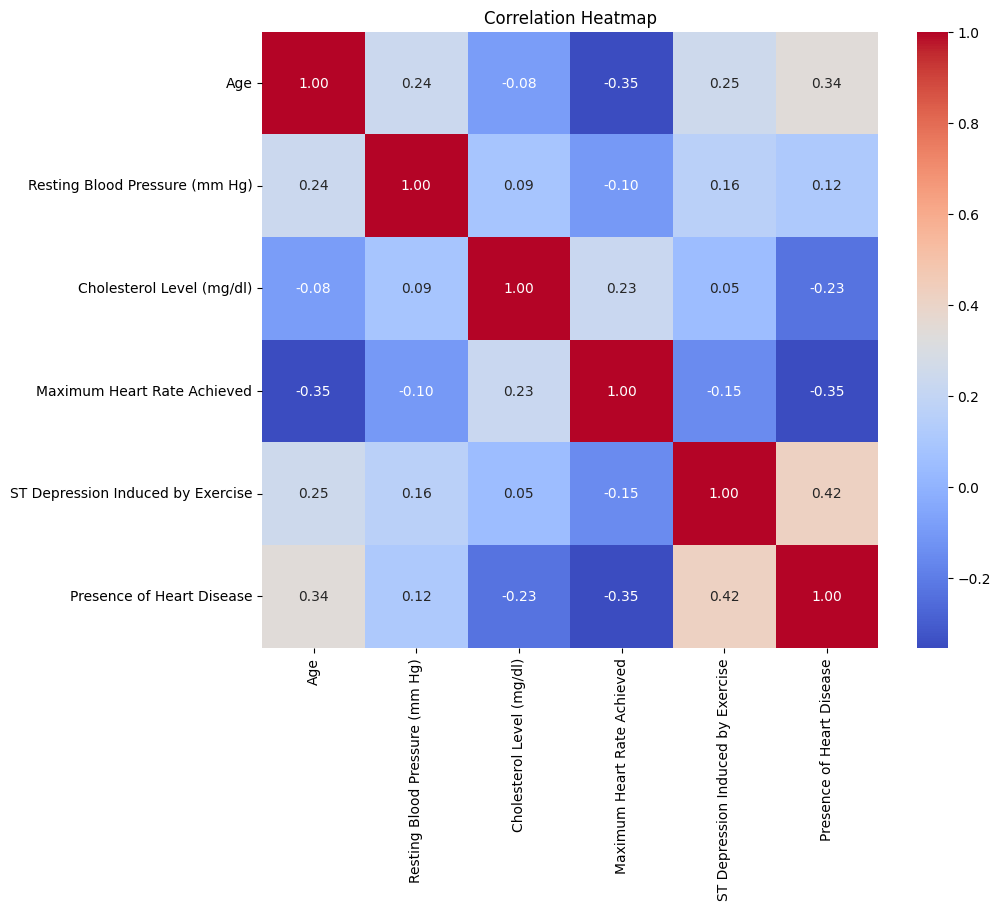

In [26]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_features + ['num']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            xticklabels=[feature_names.get(x, x) for x in numeric_features + ['num']],
            yticklabels=[feature_names.get(x, x) for x in numeric_features + ['num']])
plt.title('Correlation Heatmap')
plt.show()